In [1]:
import functions_tunning as ft
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
dataset_targets = {
    "depression\\depression_transformed.csv": "History of Mental Illness",
    "diabetes\\diabetes_transformed.csv": "diabetes",
    "loan\\loan_transformed.csv": "charged_off",
    "weather\\weather_transformed.csv": "RainTomorrow"
}

In [3]:
X_train0, X_test0, y_train0, y_test0 = ft.load_and_split(list(dataset_targets.keys())[0], dataset_targets[list(dataset_targets.keys())[0]])
X_train1, X_test1, y_train1, y_test1 = ft.load_and_split(list(dataset_targets.keys())[1], dataset_targets[list(dataset_targets.keys())[1]])
X_train2, X_test2, y_train2, y_test2 = ft.load_and_split(list(dataset_targets.keys())[2], dataset_targets[list(dataset_targets.keys())[2]])
X_train3, X_test3, y_train3, y_test3 = ft.load_and_split(list(dataset_targets.keys())[3], dataset_targets[list(dataset_targets.keys())[3]])

## Modele

In [4]:
model1 = XGBClassifier(random_state=42, tree_method = "hist", device = "cuda")
model2 = RandomForestClassifier(random_state=42)
model3 = LogisticRegression(random_state=42)

### Siatki modeli wraz z uzasadnieniem wyboru

In [5]:
logistic_param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['elasticnet'],
    'l1_ratio': np.linspace(0, 1, 10),
    'solver': ['saga'],
    'max_iter': [1000, 2000, 5000]
}

xgb_param_grid = {
    "n_estimators": [300, 600, 900, 1200],
    "max_depth": [3, 4, 6, 8],
    "learning_rate": [0.01, 0.03, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 2, 5, 8],
    "gamma": [0.0, 1.0, 3.0],
    "reg_lambda": [0.0, 1.0, 5.0, 10.0],
    "reg_alpha": [0.0, 0.1, 1.0, 5.0],
    "scale_pos_weight": [1.0, 2.0, 5.0] 
}
forest_param_grid = {
    "n_estimators": [100, 300, 600, 1000],         # liczba drzew w lesie
    "max_depth": [None, 5, 10, 20, 30],            # maksymalna głębokość drzewa
    "min_samples_split": [2, 5, 10],               # minimalna liczba próbek do podziału węzła
    "min_samples_leaf": [1, 2, 4],                 # minimalna liczba próbek w liściu
    "max_features": ["sqrt", "log2", None],        # liczba cech branych pod uwagę przy podziale
    "bootstrap": [True, False],                    # czy używać bootstrapowania próbek
    "criterion": ["gini", "entropy", "log_loss"],  # funkcja oceny jakości podziału
    "class_weight": [None, "balanced"],            # dla niezbalansowanych danych
}

## Szukanie najlepszych hiperparametrów dla par model - zbiór danych

In [6]:
results_rs1, results_bs1, scores_rs1, full_results_df1 = ft.tune_for_each_data(model1, xgb_param_grid, [X_train0, X_train1, X_train2, X_train3], [y_train0, y_train1, y_train2, y_train3])

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
results_rs2, results_bs2, scores_rs2, full_results_df2 = ft.tune_for_each_data(model2, forest_param_grid, [X_train0, X_train1, X_train2, X_train3], [y_train0, y_train1, y_train2, y_train3])

In [ ]:
results_rs3, results_bs3, scores_rs3, full_results_df3 = ft.tune_for_each_data(model3, logistic_param_grid, [X_train0, X_train1, X_train2, X_train3], [y_train0, y_train1, y_train2, y_train3])

In [7]:
datasets = ['Depression', 'Diabetes', 'Loan', 'Weather']

--- Dla zbioru danych: Depression ---


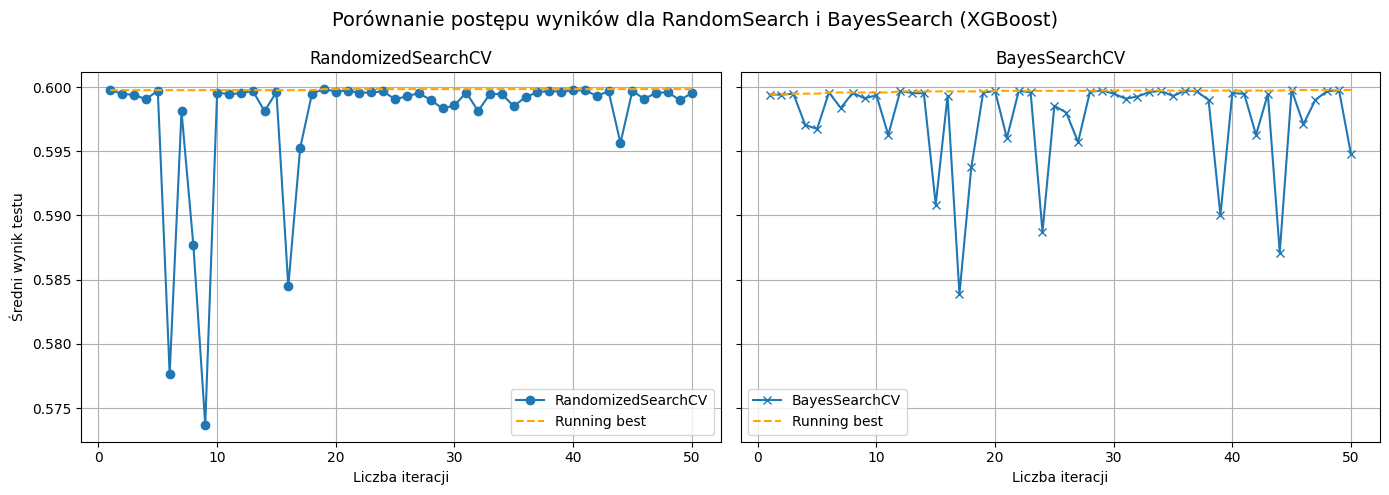

Najlepsze hiperparametry random: {'subsample': 0.6, 'scale_pos_weight': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.03, 'gamma': 3.0, 'colsample_bytree': 0.6}
Najlepszy wynik random: 0.5998429531024426
Najlepsze hiperparametry bayes: OrderedDict({'colsample_bytree': 0.8, 'gamma': 3.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 5.0, 'reg_lambda': 5.0, 'scale_pos_weight': 1.0, 'subsample': 1.0})
Najlepszy wynik bayes: 0.5997726013049468
--- Dla zbioru danych: Diabetes ---


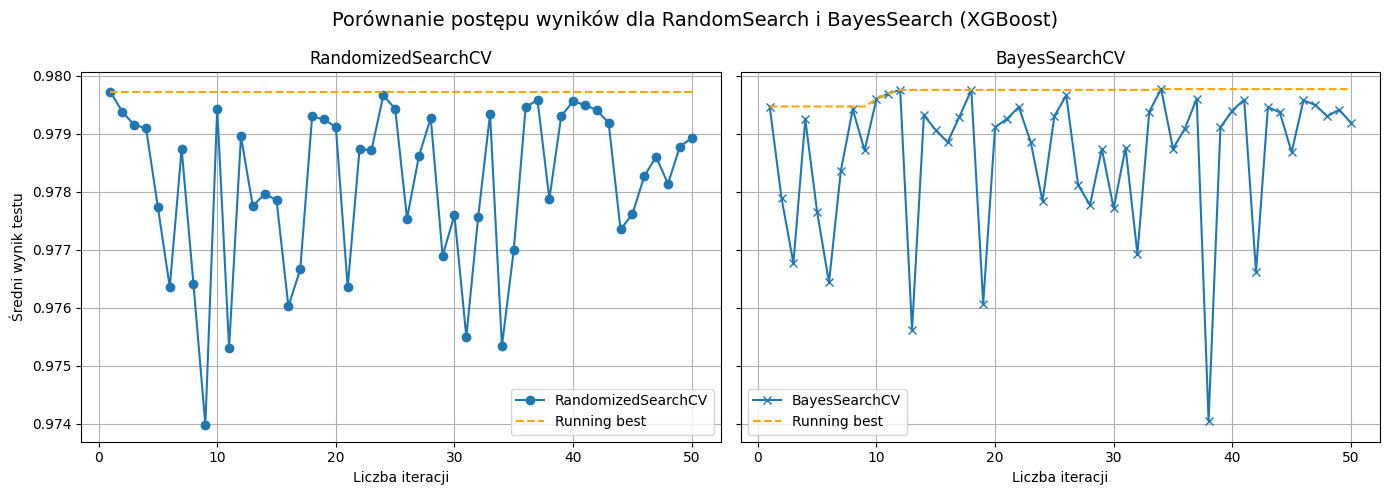

Najlepsze hiperparametry random: {'subsample': 1.0, 'scale_pos_weight': 5.0, 'reg_lambda': 5.0, 'reg_alpha': 5.0, 'n_estimators': 900, 'min_child_weight': 8, 'max_depth': 3, 'learning_rate': 0.03, 'gamma': 1.0, 'colsample_bytree': 0.8}
Najlepszy wynik random: 0.9797196706395592
Najlepsze hiperparametry bayes: OrderedDict({'colsample_bytree': 0.6, 'gamma': 3.0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 300, 'reg_alpha': 0.0, 'reg_lambda': 5.0, 'scale_pos_weight': 5.0, 'subsample': 1.0})
Najlepszy wynik bayes: 0.9797683877901878
--- Dla zbioru danych: Loan ---


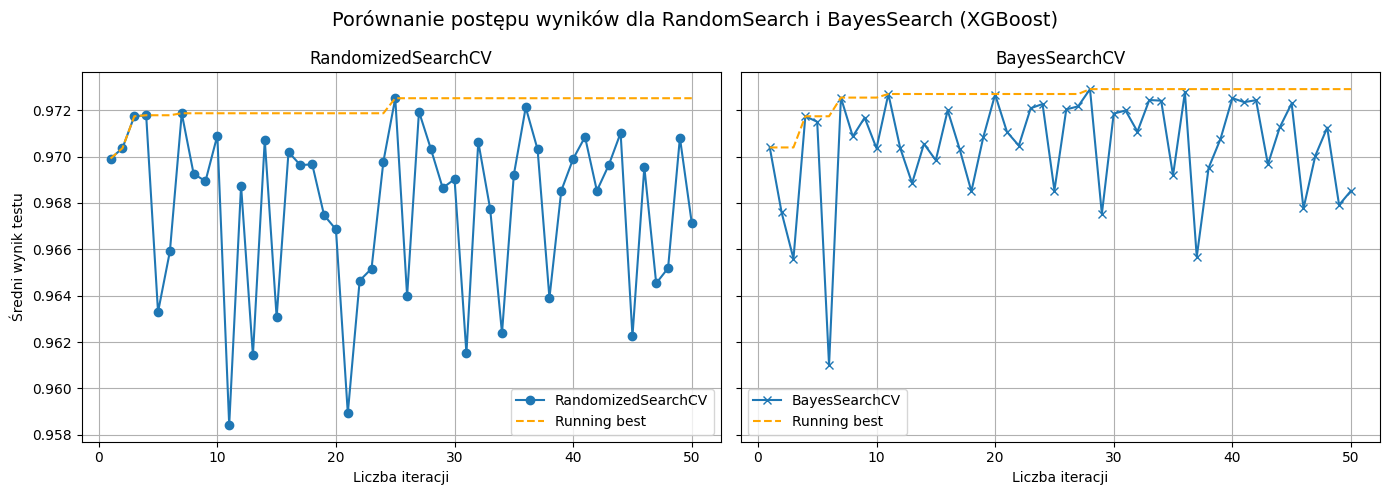

Najlepsze hiperparametry random: {'subsample': 0.6, 'scale_pos_weight': 5.0, 'reg_lambda': 10.0, 'reg_alpha': 0.0, 'n_estimators': 900, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 1.0, 'colsample_bytree': 1.0}
Najlepszy wynik random: 0.9725191380739493
Najlepsze hiperparametry bayes: OrderedDict({'colsample_bytree': 1.0, 'gamma': 3.0, 'learning_rate': 0.03, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 1200, 'reg_alpha': 0.0, 'reg_lambda': 5.0, 'scale_pos_weight': 5.0, 'subsample': 0.8})
Najlepszy wynik bayes: 0.9729116765340974
--- Dla zbioru danych: Weather ---


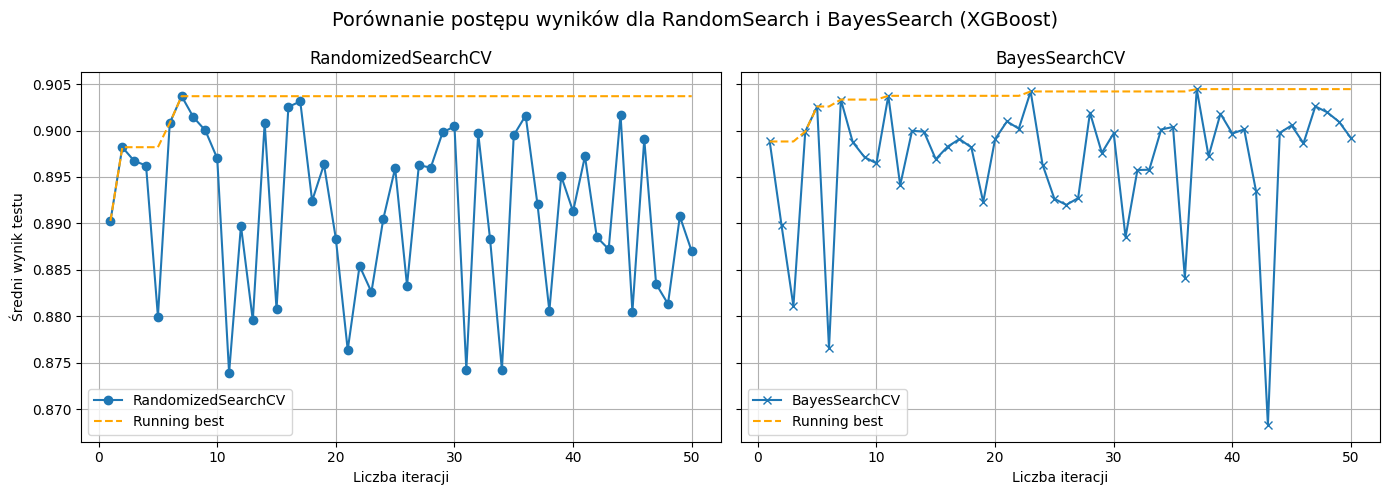

Najlepsze hiperparametry random: {'subsample': 0.8, 'scale_pos_weight': 1.0, 'reg_lambda': 10.0, 'reg_alpha': 1.0, 'n_estimators': 1200, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 1.0, 'colsample_bytree': 1.0}
Najlepszy wynik random: 0.9037007711648792
Najlepsze hiperparametry bayes: OrderedDict({'colsample_bytree': 0.6, 'gamma': 1.0, 'learning_rate': 0.03, 'max_depth': 8, 'min_child_weight': 8, 'n_estimators': 900, 'reg_alpha': 0.0, 'reg_lambda': 5.0, 'scale_pos_weight': 2.0, 'subsample': 0.8})
Najlepszy wynik bayes: 0.9044620692593229


In [37]:
best_rs_params1 = []
best_bs_params1 = []
best_rs_scores1 = []
best_bs_scores1 = []
for i in range(len(results_rs1)):
    print('--- Dla zbioru danych:', datasets[i], '---')
    ft.plots_for_iterations(results_rs1[i], results_bs1[i])
    best_rs_params1.append(results_rs1[i].best_params_)
    best_rs_scores1.append(results_rs1[i].best_score_)
    best_bs_params1.append(results_bs1[i].best_params_)
    best_bs_scores1.append(results_bs1[i].best_score_)
    print('Najlepsze hiperparametry random:', best_rs_params1[i])
    print('Najlepszy wynik random:', best_rs_scores1[i])
    print('Najlepsze hiperparametry bayes:', best_bs_params1[i])
    print('Najlepszy wynik bayes:', best_bs_scores1[i])

In [ ]:
best_rs_params2 = []
best_bs_params2 = []
best_rs_scores2 = []
best_bs_scores2 = []
for i in range(len(results_rs2)):
    print('--- Dla zbioru danych:', datasets[i], '---')
    ft.plots_for_iterations(results_rs2[i], results_bs2[i])
    best_rs_params2.append(results_rs2[i].best_params_)
    best_rs_scores2.append(results_rs2[i].best_score_)
    best_bs_params2.append(results_bs2[i].best_params_)
    best_bs_scores2.append(results_bs2[i].best_score_)
    print('Najlepsze hiperparametry random:', best_rs_params2[i])
    print('Najlepszy wynik random:', best_rs_scores2[i])
    print('Najlepsze hiperparametry bayes:', best_bs_params2[i])
    print('Najlepszy wynik bayes:', best_bs_scores2[i])

In [ ]:
best_rs_params3 = []
best_bs_params3 = []
best_rs_scores3 = []
best_bs_scores3 = []
for i in range(len(results_rs3)):
    print('--- Dla zbioru danych:', datasets[i], '---')
    ft.plots_for_iterations(results_rs3[i], results_bs3[i])
    best_rs_params3.append(results_rs3[i].best_params_)
    best_rs_scores3.append(results_rs3[i].best_score_)
    best_bs_params3.append(results_bs3[i].best_params_)
    best_bs_scores3.append(results_bs3[i].best_score_)
    print('Najlepsze hiperparametry random:', best_rs_params3[i])
    print('Najlepszy wynik random:', best_rs_scores3[i])
    print('Najlepsze hiperparametry bayes:', best_bs_params3[i])
    print('Najlepszy wynik bayes:', best_bs_scores3[i])

Z otrzymanych wykresów możemy odczytać po ilu iteracjach każda z metod znajduje już parametry otrzymujące najlepszy wynik.

## Wyznaczenie uniwersalnych hiperparametrów dla każego modelu

In [2]:
hyperparameter = [col for col in full_results_df1.columns if col not in ['mean_test_score', 'dataset']]
print(hyperparameter)
    # Uśrednienie wyników dla każdego zestawu hiperparametrów (po wszystkich zbiorach danych)
df_grouped = full_results_df1.groupby(hyperparameter)['mean_test_score'].mean().reset_index()
print(df_grouped.dtypes)
for col in hyperparameter:
    if col in full_results_df1.columns:
        df_grouped[col] = df_grouped[col].astype(full_results_df1[col].dtype)

# Wybór najlepszego zestawu hiperparametrów
best_idx = df_grouped['mean_test_score'].idxmax()
best_params = {}
for param in hyperparameter:
    value = df_grouped.loc[best_idx, param]
    best_params[param] = value
    print(f"{param}: {value} ({type(value)})")
#best_params = df_grouped.loc[best_idx, hyperparameter].to_dict()
best_score = df_grouped.loc[best_idx, 'mean_test_score']

# Posortowana tabela wszystkich kombinacji hiperparametrów
df_sorted = df_grouped.sort_values('mean_test_score', ascending=False)

#return best_params, best_score, df_sorted


NameError: name 'full_results_df1' is not defined

In [48]:
ft.search_for_default(full_results_df1)

({'subsample': 0.8,
  'scale_pos_weight': 1.0,
  'reg_lambda': 10.0,
  'reg_alpha': 1.0,
  'n_estimators': 1200.0,
  'min_child_weight': 1.0,
  'max_depth': 6.0,
  'learning_rate': 0.03,
  'gamma': 1.0,
  'colsample_bytree': 1.0},
 np.float64(0.8631068956633297),
     subsample  scale_pos_weight  reg_lambda  reg_alpha  n_estimators  \
 23        0.8               1.0        10.0        1.0          1200   
 20        0.8               1.0         1.0        0.0           600   
 1         0.6               1.0         0.0        0.1           600   
 44        1.0               2.0         5.0        5.0          1200   
 42        1.0               2.0         5.0        0.1           900   
 22        0.8               1.0        10.0        0.0           300   
 17        0.6               5.0        10.0        0.0           900   
 41        1.0               2.0         1.0        0.1           900   
 49        1.0               5.0        10.0        1.0           600   
 39   

In [49]:
default_params1, default_score1, df_sorted1 = ft.search_for_default(full_results_df1)
#default_params2, default_score2, df_sorted2 = ft.search_for_default(full_results_df2)
#default_params3, default_score3, df_sorted3 = ft.search_for_default(full_results_df3)

In [36]:
print('Najlepsze (uniwersalne) hiperparametry dla modelu 1(XGBoost):', default_params1)
print('Najlepszy (średnio) wynik dla modelu 1(XGBoost):', default_score1)

Najlepsze (uniwersalne) hiperparametry dla modelu 1(XGBoost): {'subsample': 0.8, 'scale_pos_weight': 1.0, 'reg_lambda': 10.0, 'reg_alpha': 1.0, 'n_estimators': 1200.0, 'min_child_weight': 1.0, 'max_depth': 6.0, 'learning_rate': 0.03, 'gamma': 1.0, 'colsample_bytree': 1.0}
Najlepszy (średnio) wynik dla modelu 1(XGBoost): 0.8631068956633297


In [24]:
full_results_df1['n_estimators']

0       900
1      1200
2       300
3       300
4       300
       ... 
195     900
196    1200
197     900
198     300
199     300
Name: n_estimators, Length: 200, dtype: int64

In [ ]:
print('Najlepsze (uniwersalne) hiperparametry dla modelu 2(Random Forest):', default_params2)
print('Najlepszy (średnio) wynik dla modelu 2(Random Forest):', default_score2)

In [ ]:
print('Najlepsze (uniwersalne) hiperparametry dla modelu 3(Logistic Regression):', default_params3)
print('Najlepszy (średnio) wynik dla modelu 3(Logistic Regression):', default_score3)

## Analiza różnic pomiędzy domyślnymi, a najlepszymi parametrami

In [32]:
type(default_params1['n_estimators'])

float

In [17]:
# Sprawdź co zwraca RandomizedSearchCV bezpośrednio:
print("Bezpośrednio z RandomizedSearchCV:")
print(results_rs1[0].best_params_)
print(type(results_rs1[0].best_params_['n_estimators']))
# ✅ Powinno być: <class 'int'>

# Teraz sprawdź po DataFrame:
rs_df = pd.DataFrame(results_rs1[0].cv_results_)
params_df = pd.DataFrame(rs_df['params'].tolist())
print("\nPo konwersji do DataFrame:")
print(params_df['n_estimators'].iloc[0])
print(type(params_df['n_estimators'].iloc[0]))
# ❌ Może być: <class 'numpy.int64'> lub <class 'float'>


Bezpośrednio z RandomizedSearchCV:
{'subsample': 0.6, 'scale_pos_weight': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.03, 'gamma': 3.0, 'colsample_bytree': 0.6}
<class 'int'>

Po konwersji do DataFrame:
900
<class 'numpy.int64'>


In [16]:
default_params1, best_rs_params1

({'subsample': 0.8,
  'scale_pos_weight': 1.0,
  'reg_lambda': 10.0,
  'reg_alpha': 1.0,
  'n_estimators': 1200.0,
  'min_child_weight': 1.0,
  'max_depth': 6.0,
  'learning_rate': 0.03,
  'gamma': 1.0,
  'colsample_bytree': 1.0},
 [{'subsample': 0.6,
   'scale_pos_weight': 1.0,
   'reg_lambda': 1.0,
   'reg_alpha': 5.0,
   'n_estimators': 900,
   'min_child_weight': 1,
   'max_depth': 4,
   'learning_rate': 0.03,
   'gamma': 3.0,
   'colsample_bytree': 0.6},
  {'subsample': 1.0,
   'scale_pos_weight': 5.0,
   'reg_lambda': 5.0,
   'reg_alpha': 5.0,
   'n_estimators': 900,
   'min_child_weight': 8,
   'max_depth': 3,
   'learning_rate': 0.03,
   'gamma': 1.0,
   'colsample_bytree': 0.8},
  {'subsample': 0.6,
   'scale_pos_weight': 5.0,
   'reg_lambda': 10.0,
   'reg_alpha': 0.0,
   'n_estimators': 900,
   'min_child_weight': 2,
   'max_depth': 6,
   'learning_rate': 0.01,
   'gamma': 1.0,
   'colsample_bytree': 1.0},
  {'subsample': 0.8,
   'scale_pos_weight': 1.0,
   'reg_lambda': 10.

TO DO sprawdzić jaka różnica pomiędzy print a wywołaniem funckji

In [11]:
print('Różnica dla modelu 1 (XGBoost) roc-auc: ')
for i in range(len(best_bs_scores1)):
    diff = best_bs_scores1[i] - default_score1
    print(f'Ramka danych {datasets[i]}: {diff}')
    
# print('Różnica dla modelu 2 (Random Forest) roc-auc: ')
# for i in range(len(best_bs_scores2)):
#     diff = best_bs_scores2[i] - default_score2
#     print(f'Ramka danych {datasets[i]}: {diff}')
    
# print('Różnica dla modelu 3 (Logistic Regression) roc-auc: ')
# for i in range(len(best_bs_scores3)):
#     diff = best_bs_scores3[i] - default_score3
#     print(f'Ramka danych {datasets[i]}: {diff}')

Różnica dla modelu 1 (XGBoost) roc-auc: 
Ramka danych Depression: -0.26333429435838285
Ramka danych Diabetes: 0.11666149212685817
Ramka danych Loan: 0.10980478087076773
Ramka danych Weather: 0.04135517359599328


In [54]:
default_scores1, best_scores1, diff_scores1 = ft.analyze_tunability(model1, [X_train0, X_train1, X_train2, X_train3], [y_train0, y_train1, y_train2, y_train3], best_rs_params1, default_params1)

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\alapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1682, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\alapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\alapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py", line 180, in train
    for i in range(start_iteration, num_boost_round):
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: 'float' object cannot be interpreted as an integer


In [ ]:
default_scores2, best_scores2, diff_scores2 = ft.analyze_tunability(model2, [X_train0, X_train1, X_train2, X_train3], [y_train0, y_train1, y_train2, y_train3], best_rs_params2, default_params2)

In [ ]:
default_scores3, best_scores3, diff_scores3 = ft.analyze_tunability(model3, [X_train0, X_train1, X_train2, X_train3], [y_train0, y_train1, y_train2, y_train3], best_rs_params3, default_params3)

Heatmap

In [ ]:
diff_matrix = np.array([diff_scores1, diff_scores2, diff_scores3])
models = ['XGBoost', 'Random Forest', 'Logistic Regression']
datasets = ['Depression', 'Diabetes', 'Loan', 'Weather']
df_diff = pd.DataFrame(
    diff_matrix,
    index=models,
    columns=datasets
)
plt.figure(figsize=(10, 6))
sns.heatmap(df_diff, annot=True, fmt='.4f', cmap='YlGn', 
            cbar_kws={'label': 'Tunability (Improvement)'}, linewidths=0.5)
plt.title('Tunowalność algorytmów - Porównanie modeli i zbiorów danych', fontsize=14, fontweight='bold')
plt.ylabel('Model', fontsize=12)
plt.xlabel('Zbiór danych', fontsize=12)
plt.tight_layout()
plt.show()

Boxplot

In [ ]:
plt.boxplot(data=[diff_scores1, diff_scores2, diff_scores3], labels=models)
plt.title('Porównanie tunowalności modeli', fontsize=14, fontweight='bold')
plt.ylabel('Tunowalność (Różnica AUC)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.tight_layout()
plt.show()

## Analiza wpływu hiperparametrów na wydajność modeli

## Ewaluacja na zbiorach testowych

In [ ]:
test_auc1, report1 = ft.evaluate_on_test(model1, best_rs_params1, X_train1, y_train1, X_test1, y_test1)
test_auc2, report2 = ft.evaluate_on_test(model2, best_rs_params2, X_train2, y_train2, X_test2, y_test2)
test_auc3, report3 = ft.evaluate_on_test(model3, best_rs_params3, X_train3, y_train3, X_test3, y_test3)

In [ ]:
print("XGBClassifier - Najlepsze domyślne hiperparametry:", best_rs_params1)
print("XGBClassifier - AUC na zbiorze testowym:", test_auc1)
print("XGBClassifier - Raport klasyfikacji:\n", report1)
print("RandomForestClassifier - Najlepsze domyślne hiperparametry:", best_rs_params2)
print("RandomForestClassifier - AUC na zbiorze testowym:", test_auc2)
print("RandomForestClassifier - Raport klasyfikacji:\n", report2)   
print("LogisticRegression - Najlepsze domyślne hiperparametry:", best_rs_params3)
print("LogisticRegression - AUC na zbiorze testowym:", test_auc3)
print("LogisticRegression - Raport klasyfikacji:\n", report3)